*IMPORTING NECESSARY PACKAGES*

In [8]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

*LOADING THE DATASET*

In [9]:

DF=pd.read_csv(r"C:\VS PROJECTS\ACME EMP ATTRITION\Acme-Employee-Attrition-Analysis-and-Prediction\Attrition Dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv")
#checking for values and column names
print(DF.head())
print(DF.columns)
print(DF.isnull().sum())
#creating a temp dataframe for ML model
data=pd.DataFrame()
data=pd.DataFrame(data=DF)

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

DATA PREPROCESSING

In [10]:
#label encoding for string
def label_encode(df, columns):
    label_encoders = {}
    for col in columns:
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])
    return df, label_encoders

columns_to_encode = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
df_encoded, encoders = label_encode(data, columns_to_encode)

def inverse_transform(df, columns, label_encoders):
    for col in columns:
        df[col] = label_encoders[col].inverse_transform(df[col])
    return df

In [11]:
#normalization
scale=MinMaxScaler()
data['DailyRate']=scale.fit_transform(data['DailyRate'].values.reshape(-1,1))
data['HourlyRate']=scale.fit_transform(data['HourlyRate'].values.reshape(-1,1))
data['MonthlyIncome']=scale.fit_transform(data['MonthlyIncome'].values.reshape(-1,1))
data['MonthlyRate']=scale.fit_transform(data['MonthlyRate'].values.reshape(-1,1))
data['PercentSalaryHike']=scale.fit_transform(data['PercentSalaryHike'].values.reshape(-1,1))

In [12]:
#scaling
std=StandardScaler()
data['DistanceFromHome']=std.fit_transform(data['DistanceFromHome'].values.reshape(-1,1))
data['TotalWorkingYears']=std.fit_transform(data['TotalWorkingYears'].values.reshape(-1,1))
data['YearsAtCompany']=std.fit_transform(data['YearsAtCompany'].values.reshape(-1,1))

*MODEL*

Accuracy Score of the Model: 0.8820861678004536


 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       406
           1       0.38      0.77      0.51        35

    accuracy                           0.88       441
   macro avg       0.68      0.83      0.72       441
weighted avg       0.93      0.88      0.90       441



Confusion matrix of the model:



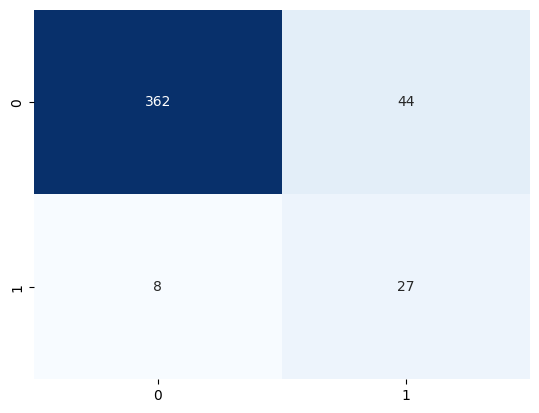

In [13]:
#filtered features that doesn't require label encoding
data1=data[['Age',  'DailyRate', 
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',  'HourlyRate',
       'JobInvolvement', 'JobLevel',  'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
#features that requires label encoding
data2=df_encoded[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18', 'OverTime',]]
#merging 2 dataframes for feature variable
X=pd.concat([data1,data2],axis=1)
#specifying the target variable
y=df_encoded['Attrition']
#splitting training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)
#ML model
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy Score of the Model:",accuracy_score(y_test,y_pred))
print("\n\n Classification Report:\n",classification_report(y_pred,y_test))
print("\n\nConfusion matrix of the model:\n")
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True, cmap='Blues', fmt='g', cbar=False)
#decoding the predicted and adding to the last column of data
DF.insert(len(DF.columns), "prediction",encoders['Attrition'].inverse_transform(model.predict(X)))

*POWERBI PYTHON SCRIPT*

In [14]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# import warnings
# warnings.filterwarnings("ignore")

# #label encoding for string
# def label_encode(df, columns):
#     label_encoders = {}
#     for col in columns:
#         label_encoders[col] = LabelEncoder()
#         df[col] = label_encoders[col].fit_transform(df[col])
#     return df, label_encoders

# columns_to_encode = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
# df_encoded, encoders = label_encode(dataset, columns_to_encode)

# def inverse_transform(df, columns, label_encoders):
#     for col in columns:
#         df[col] = label_encoders[col].inverse_transform(df[col])
#     return df

# scale=MinMaxScaler()
# dataset['DailyRate']=scale.fit_transform(dataset['DailyRate'].values.reshape(-1,1))
# dataset['HourlyRate']=scale.fit_transform(dataset['HourlyRate'].values.reshape(-1,1))
# dataset['MonthlyIncome']=scale.fit_transform(dataset['MonthlyIncome'].values.reshape(-1,1))
# dataset['MonthlyRate']=scale.fit_transform(dataset['MonthlyRate'].values.reshape(-1,1))
# dataset['PercentSalaryHike']=scale.fit_transform(dataset['PercentSalaryHike'].values.reshape(-1,1))

# std=StandardScaler()
# dataset['DistanceFromHome']=std.fit_transform(dataset['DistanceFromHome'].values.reshape(-1,1))
# dataset['TotalWorkingYears']=std.fit_transform(dataset['TotalWorkingYears'].values.reshape(-1,1))
# dataset['YearsAtCompany']=std.fit_transform(dataset['YearsAtCompany'].values.reshape(-1,1))
# #ML model
# data1=dataset[['Age',  'DailyRate', 
#        'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',  'HourlyRate',
#        'JobInvolvement', 'JobLevel',  'JobSatisfaction',
#         'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
#         'PercentSalaryHike', 'PerformanceRating',
#        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
#        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
#        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
#        'YearsWithCurrManager']]
# data2=df_encoded[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18', 'OverTime',]]
# X=pd.concat([data1,data2],axis=1)
# y=df_encoded['Attrition']
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

# dt=LogisticRegression()
# dt.fit(X_train,y_train)
# df_decoded = inverse_transform(df_encoded, [col for col in columns_to_encode], encoders)
# dataset=pd.concat([data1,df_decoded],axis=1)
# dataset.insert(len(dataset.columns), "prediction",encoders['Attrition'].inverse_transform(dt.predict(X)))
